# Analytical Regression
Computing a regression using preudo-inverse matrices

Author: Pierre Nugues

## The modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## The Functions

### Pseudo-inverse with a numpy `array`

In [2]:
def regression_array(X, y, reg=0.0):
    """
    Computes the regression using numpy arrays
    :param observations:
    :return: weights, ŷ, sse
    """
    if reg != 0.0:
        print('Regularized')
    I = np.identity(X.shape[1])
    w = (np.linalg.inv(X.T @ X + reg * I) @ X.T) @ y
    # Or directly with pinv()
    # w = np.linalg.pinv(X) @ y
    y_hat = X @ w
    se = (y_hat - y) * (y_hat - y)
    sse = (y_hat - y).T @ (y_hat - y)
    return w, y_hat, se, sse

## The Dataset

The number of characters and number of _a_ in the French and English chapters

In [3]:
stat_fr = np.array([[36961, 2503],
                      [43621, 2992],
                      [15694, 1042],
                      [36231, 2487],
                      [29945, 2014],
                      [40588, 2805],
                      [75255, 5062],
                      [37709, 2643],
                      [30899, 2126],
                      [25486, 1784],
                      [37497, 2641],
                      [40398, 2766],
                      [74105, 5047],
                      [76725, 5312],
                      [18317, 1215]])

stat_en = np.array([[35680, 2217],
                      [42514, 2761],
                      [15162, 990],
                      [35298, 2274],
                      [29800, 1865],
                      [40255, 2606],
                      [74532, 4805],
                      [37464, 2396],
                      [31030, 1993],
                      [24843, 1627],
                      [36172, 2375],
                      [39552, 2560],
                      [72545, 4597],
                      [75352, 4871],
                      [18031, 1119]])

In [4]:
stat_fr.shape

(15, 2)

In [5]:
np.ones((stat_fr.shape[0],1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [6]:
stat_fr = np.hstack((np.ones((stat_fr.shape[0],1)), stat_fr))
stat_fr

array([[1.0000e+00, 3.6961e+04, 2.5030e+03],
       [1.0000e+00, 4.3621e+04, 2.9920e+03],
       [1.0000e+00, 1.5694e+04, 1.0420e+03],
       [1.0000e+00, 3.6231e+04, 2.4870e+03],
       [1.0000e+00, 2.9945e+04, 2.0140e+03],
       [1.0000e+00, 4.0588e+04, 2.8050e+03],
       [1.0000e+00, 7.5255e+04, 5.0620e+03],
       [1.0000e+00, 3.7709e+04, 2.6430e+03],
       [1.0000e+00, 3.0899e+04, 2.1260e+03],
       [1.0000e+00, 2.5486e+04, 1.7840e+03],
       [1.0000e+00, 3.7497e+04, 2.6410e+03],
       [1.0000e+00, 4.0398e+04, 2.7660e+03],
       [1.0000e+00, 7.4105e+04, 5.0470e+03],
       [1.0000e+00, 7.6725e+04, 5.3120e+03],
       [1.0000e+00, 1.8317e+04, 1.2150e+03]])

In [7]:
stat_en = np.hstack((np.ones((stat_en.shape[0],1)), stat_en))
stat_en

array([[1.0000e+00, 3.5680e+04, 2.2170e+03],
       [1.0000e+00, 4.2514e+04, 2.7610e+03],
       [1.0000e+00, 1.5162e+04, 9.9000e+02],
       [1.0000e+00, 3.5298e+04, 2.2740e+03],
       [1.0000e+00, 2.9800e+04, 1.8650e+03],
       [1.0000e+00, 4.0255e+04, 2.6060e+03],
       [1.0000e+00, 7.4532e+04, 4.8050e+03],
       [1.0000e+00, 3.7464e+04, 2.3960e+03],
       [1.0000e+00, 3.1030e+04, 1.9930e+03],
       [1.0000e+00, 2.4843e+04, 1.6270e+03],
       [1.0000e+00, 3.6172e+04, 2.3750e+03],
       [1.0000e+00, 3.9552e+04, 2.5600e+03],
       [1.0000e+00, 7.2545e+04, 4.5970e+03],
       [1.0000e+00, 7.5352e+04, 4.8710e+03],
       [1.0000e+00, 1.8031e+04, 1.1190e+03]])

## Computing the Regression Using `array`

In [8]:
pattern = [('red', 's'), ('green', '^')]
lang = [None] * 2

Language: 0
X: [[1.0000e+00 3.5680e+04]
 [1.0000e+00 4.2514e+04]
 [1.0000e+00 1.5162e+04]
 [1.0000e+00 3.5298e+04]
 [1.0000e+00 2.9800e+04]
 [1.0000e+00 4.0255e+04]
 [1.0000e+00 7.4532e+04]
 [1.0000e+00 3.7464e+04]
 [1.0000e+00 3.1030e+04]
 [1.0000e+00 2.4843e+04]
 [1.0000e+00 3.6172e+04]
 [1.0000e+00 3.9552e+04]
 [1.0000e+00 7.2545e+04]
 [1.0000e+00 7.5352e+04]
 [1.0000e+00 1.8031e+04]]
y: [[2217.]
 [2761.]
 [ 990.]
 [2274.]
 [1865.]
 [2606.]
 [4805.]
 [2396.]
 [1993.]
 [1627.]
 [2375.]
 [2560.]
 [4597.]
 [4871.]
 [1119.]]
ŷ: [[2290.67191078]
 [2730.10675161]
 [ 971.33856803]
 [2266.10882778]
 [1912.58047617]
 [2584.85019536]
 [4788.90463484]
 [2405.38536645]
 [1991.67103136]
 [1593.83910859]
 [2322.30813286]
 [2539.64640649]
 [4661.13802249]
 [4841.63167164]
 [1155.81889557]]
Squared errors: [[5.42755044e+03]
 [9.54392796e+02]
 [3.48249043e+02]
 [6.22705990e+01]
 [2.26390171e+03]
 [4.47314236e+02]
 [2.59060780e+02]
 [8.80851033e+01]
 [1.76615763e+00]
 [1.09964472e+03]
 [2.77643286e+0

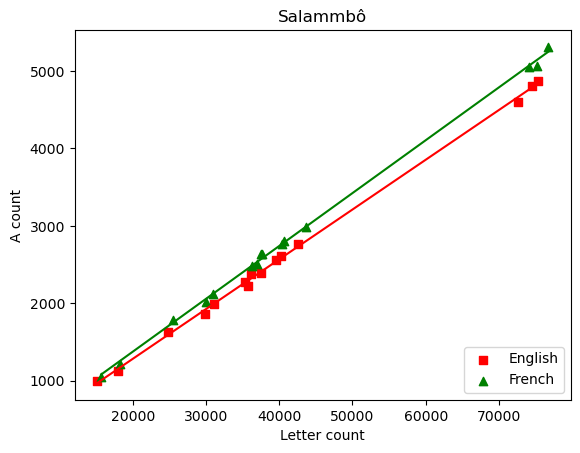

In [9]:
for i, stats in enumerate([stat_en, stat_fr]):
    x_l = stats[:, 1]
    y_l = stats[:, -1]
    lang[i] = plt.scatter(x_l, y_l, color=pattern[i][0], marker=pattern[i][1])
    X = stats[:, :-1]
    y =stats[:, -1:]
    w, y_hat, se, sse = regression_array(X, y)
    print('Language:', i)
    print('X:', X)
    print('y:', y)
    print('ŷ:', y_hat)
    print('Squared errors:', se)
    print("Weights", w.T)
    print("SSE", sse)
    plt.plot([min(x_l), max(x_l)],
             [([1, min(x_l)] @ w), ([1, max(x_l)] @ w)],
             color=pattern[i][0])
plt.title("Salammbô")
plt.xlabel("Letter count")
plt.ylabel("A count")
plt.legend((lang[0], lang[1]), ('English', 'French'), loc='lower right', scatterpoints=1)
plt.show()

## Singular Matrix

We now introduce a singular matrix, something all too frequent in regression experiments. We just duplicate one column.

In [10]:
stat_fr

array([[1.0000e+00, 3.6961e+04, 2.5030e+03],
       [1.0000e+00, 4.3621e+04, 2.9920e+03],
       [1.0000e+00, 1.5694e+04, 1.0420e+03],
       [1.0000e+00, 3.6231e+04, 2.4870e+03],
       [1.0000e+00, 2.9945e+04, 2.0140e+03],
       [1.0000e+00, 4.0588e+04, 2.8050e+03],
       [1.0000e+00, 7.5255e+04, 5.0620e+03],
       [1.0000e+00, 3.7709e+04, 2.6430e+03],
       [1.0000e+00, 3.0899e+04, 2.1260e+03],
       [1.0000e+00, 2.5486e+04, 1.7840e+03],
       [1.0000e+00, 3.7497e+04, 2.6410e+03],
       [1.0000e+00, 4.0398e+04, 2.7660e+03],
       [1.0000e+00, 7.4105e+04, 5.0470e+03],
       [1.0000e+00, 7.6725e+04, 5.3120e+03],
       [1.0000e+00, 1.8317e+04, 1.2150e+03]])

In [11]:
stat_fr_sing = np.hstack((stat_fr[:, :-1], stat_fr[:, -2:-1], stat_fr[:, -1:]))
stat_fr_sing

array([[1.0000e+00, 3.6961e+04, 3.6961e+04, 2.5030e+03],
       [1.0000e+00, 4.3621e+04, 4.3621e+04, 2.9920e+03],
       [1.0000e+00, 1.5694e+04, 1.5694e+04, 1.0420e+03],
       [1.0000e+00, 3.6231e+04, 3.6231e+04, 2.4870e+03],
       [1.0000e+00, 2.9945e+04, 2.9945e+04, 2.0140e+03],
       [1.0000e+00, 4.0588e+04, 4.0588e+04, 2.8050e+03],
       [1.0000e+00, 7.5255e+04, 7.5255e+04, 5.0620e+03],
       [1.0000e+00, 3.7709e+04, 3.7709e+04, 2.6430e+03],
       [1.0000e+00, 3.0899e+04, 3.0899e+04, 2.1260e+03],
       [1.0000e+00, 2.5486e+04, 2.5486e+04, 1.7840e+03],
       [1.0000e+00, 3.7497e+04, 3.7497e+04, 2.6410e+03],
       [1.0000e+00, 4.0398e+04, 4.0398e+04, 2.7660e+03],
       [1.0000e+00, 7.4105e+04, 7.4105e+04, 5.0470e+03],
       [1.0000e+00, 7.6725e+04, 7.6725e+04, 5.3120e+03],
       [1.0000e+00, 1.8317e+04, 1.8317e+04, 1.2150e+03]])

In [12]:
print('Trying regularization with a singular matrix')
# Creation of a singular matrix by duplicating a column
X = np.array(stat_fr_sing)[:, :-1]
y = np.array(stat_fr_sing)[:, -1]
print('X:', X)
print('y:', y)
try:
    regression_array(X, y)
except:
    print(np.linalg.linalg.LinAlgError)
    print("Singular matrix: Could not be inverted.")

Trying regularization with a singular matrix
X: [[1.0000e+00 3.6961e+04 3.6961e+04]
 [1.0000e+00 4.3621e+04 4.3621e+04]
 [1.0000e+00 1.5694e+04 1.5694e+04]
 [1.0000e+00 3.6231e+04 3.6231e+04]
 [1.0000e+00 2.9945e+04 2.9945e+04]
 [1.0000e+00 4.0588e+04 4.0588e+04]
 [1.0000e+00 7.5255e+04 7.5255e+04]
 [1.0000e+00 3.7709e+04 3.7709e+04]
 [1.0000e+00 3.0899e+04 3.0899e+04]
 [1.0000e+00 2.5486e+04 2.5486e+04]
 [1.0000e+00 3.7497e+04 3.7497e+04]
 [1.0000e+00 4.0398e+04 4.0398e+04]
 [1.0000e+00 7.4105e+04 7.4105e+04]
 [1.0000e+00 7.6725e+04 7.6725e+04]
 [1.0000e+00 1.8317e+04 1.8317e+04]]
y: [2503. 2992. 1042. 2487. 2014. 2805. 5062. 2643. 2126. 1784. 2641. 2766.
 5047. 5312. 1215.]
<class 'numpy.linalg.LinAlgError'>
Singular matrix: Could not be inverted.


### Singular Matrix with Regularization

Returns $\mathbf{w}$, $\mathbf{\hat{y}}$, squared errors, and the sum of squared errors

In [13]:
w, y_hat, se, sse = regression_array(X, y, reg=0.01)
w, y_hat, se, sse

Regularized


(array([9.52070438, 0.03414155, 0.0341557 ]),
 array([2533.85561432, 2988.71534485, 1081.37785318, 2483.99861683,
        2054.68206036, 2781.56976487, 5149.23076763, 2584.94196244,
        2119.83764338, 1750.14459212, 2570.46294399, 2768.59328607,
        5070.68892227, 5249.62773518, 1260.52155786]),
 array([9.52068935e+02, 1.07889594e+01, 1.55061532e+03, 9.00830092e+00,
        1.65503003e+03, 5.48975918e+02, 7.60920682e+03, 3.37073573e+03,
        3.79746391e+01, 1.14618864e+03, 4.97547627e+03, 6.72513264e+00,
        5.61165038e+02, 3.89029942e+03, 2.07221223e+03]),
 28396.471388528058)

### Pseudo-inverse with a Quasisingular Matrix

We now try regularization with a quasi singular matrix

In [15]:
print('Trying regularization with a quasi singular matrix')
np.set_printoptions(precision=10)
X = np.array(stat_fr_sing)[:, :-1]
y = np.array(stat_fr_sing)[:, -1]
X, y

Trying regularization with a quasi singular matrix


(array([[1.0000e+00, 3.6961e+04, 3.6961e+04],
        [1.0000e+00, 4.3621e+04, 4.3621e+04],
        [1.0000e+00, 1.5694e+04, 1.5694e+04],
        [1.0000e+00, 3.6231e+04, 3.6231e+04],
        [1.0000e+00, 2.9945e+04, 2.9945e+04],
        [1.0000e+00, 4.0588e+04, 4.0588e+04],
        [1.0000e+00, 7.5255e+04, 7.5255e+04],
        [1.0000e+00, 3.7709e+04, 3.7709e+04],
        [1.0000e+00, 3.0899e+04, 3.0899e+04],
        [1.0000e+00, 2.5486e+04, 2.5486e+04],
        [1.0000e+00, 3.7497e+04, 3.7497e+04],
        [1.0000e+00, 4.0398e+04, 4.0398e+04],
        [1.0000e+00, 7.4105e+04, 7.4105e+04],
        [1.0000e+00, 7.6725e+04, 7.6725e+04],
        [1.0000e+00, 1.8317e+04, 1.8317e+04]]),
 array([2503., 2992., 1042., 2487., 2014., 2805., 5062., 2643., 2126.,
        1784., 2641., 2766., 5047., 5312., 1215.]))

In [16]:
X[0][2] -= 0.000001
X, y

(array([[1.0000000000e+00, 3.6961000000e+04, 3.6960999999e+04],
        [1.0000000000e+00, 4.3621000000e+04, 4.3621000000e+04],
        [1.0000000000e+00, 1.5694000000e+04, 1.5694000000e+04],
        [1.0000000000e+00, 3.6231000000e+04, 3.6231000000e+04],
        [1.0000000000e+00, 2.9945000000e+04, 2.9945000000e+04],
        [1.0000000000e+00, 4.0588000000e+04, 4.0588000000e+04],
        [1.0000000000e+00, 7.5255000000e+04, 7.5255000000e+04],
        [1.0000000000e+00, 3.7709000000e+04, 3.7709000000e+04],
        [1.0000000000e+00, 3.0899000000e+04, 3.0899000000e+04],
        [1.0000000000e+00, 2.5486000000e+04, 2.5486000000e+04],
        [1.0000000000e+00, 3.7497000000e+04, 3.7497000000e+04],
        [1.0000000000e+00, 4.0398000000e+04, 4.0398000000e+04],
        [1.0000000000e+00, 7.4105000000e+04, 7.4105000000e+04],
        [1.0000000000e+00, 7.6725000000e+04, 7.6725000000e+04],
        [1.0000000000e+00, 1.8317000000e+04, 1.8317000000e+04]]),
 array([2503., 2992., 1042., 2487., 20

Even if the matrix is not mathematically singular, we have an unstable result with very high weights and an astronomic loss.

In [17]:
# No regularization
w, y_hat, se, sse = regression_array(X, y)
w, y_hat, se, sse

(array([ 1.3226473677e+09,  4.2694510686e+08, -4.2691951745e+08]),
 array([2.2684579035e+09, 2.4388829338e+09, 1.7242475368e+09,
        2.2497772088e+09, 2.0889221901e+09, 2.3612702594e+09,
        3.2483782663e+09, 2.2875983538e+09, 2.1133344853e+09,
        1.9748190199e+09, 2.2821733993e+09, 2.3564082719e+09,
        3.2189504471e+09, 3.2859946960e+09, 1.7913685540e+09]),
 array([5.1458899041e+18, 5.9481353706e+18, 2.9730259748e+18,
        5.0614862986e+18, 4.3635875021e+18, 5.5755839911e+18,
        1.0551928474e+19, 5.2330941359e+18, 4.4661736610e+18,
        3.8999031151e+18, 5.2083033699e+18, 5.5526469080e+18,
        1.0361609489e+19, 1.0797726232e+19, 3.2089969431e+18]),
 8.834809136928634e+19)

### With Regularization

A small regularization adds stability and results in a loss that is the same as with a nonsingular matrix

In [18]:
# With regularization
w, y_hat, se, sse = regression_array(X, y, reg=0.01)
w, y_hat, se, sse

Regularized


(array([8.5636391053, 0.0326285402, 0.0356675581]),
 array([2532.8557258994, 2987.707740174 , 1080.4026047909, 2482.9995742242,
        2053.6903007248, 2780.5656742301, 5148.1865117108, 2583.9412074141,
        2118.8447784401, 1749.157998699 , 2569.4624345885, 2767.5894155656,
        5069.6459987417, 5248.5817761149, 1259.5432704589]),
 array([8.9136436898e+02, 1.8423494414e+01, 1.4747600547e+03,
        1.6003406388e+01, 1.5753199716e+03, 5.9703627583e+02,
        7.4281148009e+03, 3.4879409817e+03, 5.1197195572e+01,
        1.2139650547e+03, 5.1176232650e+03, 2.5262418401e+00,
        5.1284125901e+02, 4.0218711207e+03, 1.9841029432e+03]),
 28393.090434533944)